# Economic Crises Forecaster

This dataset was authored by Carmen Reinhard and coauthors Ken Rogoff, Chris Trebesch and Vincent Reinhart.They include banking crises dates for more than 70 countries from 1800 to present.

**Objective**
We are going to determine the effects of the independent variables i.e. domestic debt default, gdp_weighted_default etc.
on our target variable, systemic crises in a country and perhaps

provide telltale signs early on of a troubled economy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl
import csv

In [2]:
GlobalCrisisDF = pd.read_csv("C:/Users/admin/Downloads/Documents/global_crisis_data_csv2.csv", encoding="unicode_escape")

In [3]:
GlobalCrisisDF.head(20)

,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,NaN,x,NaN,NaN,x,x,NaN,x,x,x
1,1.0,DZA,Algeria,1800.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
2,1.0,DZA,Algeria,1801.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
3,1.0,DZA,Algeria,1802.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
4,1.0,DZA,Algeria,1803.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
5,1.0,DZA,Algeria,1804.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
6,1.0,DZA,Algeria,1805.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
7,1.0,DZA,Algeria,1806.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
8,1.0,DZA,Algeria,1807.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
9,1.0,DZA,Algeria,1808.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0


In [4]:
GlobalCrisisDF.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ',
       'Banking_Crisis_Notes', 'Systemic Crisis', 'Gold Standard', 'exch_usd',
       'exch_usd_alt1', 'exch_usd_alt2', 'exch_usd_alt3', 'conversion_notes',
       'national currency', 'exch_primary source code', 'exch_sources',
       'Domestic_Debt_In_Default', 'Domestic_Debt_ Notes/Sources',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'Defaults_External_Notes', 'GDP_Weighted_default', '<',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [5]:
GlobalCrisisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15191 entries, 0 to 15190
Data columns (total 27 columns):
 #   Column                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                      --------------  -----  
 0   Case                                                                                                                                                                                                        15190 non-null  float64
 1   CC3                                                                                                                                                                                        

In [6]:
#We need to drop some columns to streamline the model's processing ability
GlobalCrisisDF = GlobalCrisisDF.drop(["Banking_Crisis_Notes",
                                      "Gold Standard","exch_usd_alt1",
                                      "exch_usd_alt2",
                                      "Country",
                                      "exch_usd_alt3",
                                      "conversion_notes",
                                      "national currency",
                                      "exch_primary source code",
                                      "exch_sources",
                                      "SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",
                                      "Defaults_External_Notes"], axis=1)

In [7]:
GlobalCrisisDF.head()

,Case,CC3,Year,Banking Crisis,Systemic Crisis,exch_usd,Domestic_Debt_In_Default,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors",GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,x,x,NaN,x,NaN,x,x,x,NaN,x,x,x
1,1.0,DZA,1800.0,0,0,NaN,0,NaN,0,0,NaN,NaN,0,0,0
2,1.0,DZA,1801.0,0,0,NaN,0,NaN,0,0,NaN,NaN,0,0,0
3,1.0,DZA,1802.0,0,0,NaN,0,NaN,0,0,NaN,NaN,0,0,0
4,1.0,DZA,1803.0,0,0,NaN,0,NaN,0,0,NaN,NaN,0,0,0


In [8]:
#Since there's no prior info by author on the meaning of the column '<', I will discard it.
GlobalCrisisDF = GlobalCrisisDF.drop("<", axis=1)
GlobalCrisisDF.head()

,Case,CC3,Year,Banking Crisis,Systemic Crisis,exch_usd,Domestic_Debt_In_Default,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors",GDP_Weighted_default,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,x,x,NaN,x,NaN,x,x,NaN,x,x,x
1,1.0,DZA,1800.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
2,1.0,DZA,1801.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
3,1.0,DZA,1802.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
4,1.0,DZA,1803.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0


In [9]:
GlobalCrisisDF = GlobalCrisisDF.rename(columns={"Banking Crisis":"banking_crisis",
                               "Systemic Crisis": "systemic_crisis",
                               "Domestic_Debt_In_Default":"domestic_debt_in_default",
                               "SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditor":"sovereign_debt_default",
                               "GDP_Weighted_default":"gdp_weighted_default", "Inflation, Annual percentages of average consumer prices":"inflation",
                               "Independence":"independence",
                               "Currency Crises":"currency_crises",
                               "Inflation Crises":"inflation_crises"})
GlobalCrisisDF.head()

,Case,CC3,Year,Banking Crisis,systemic_crisis,exch_usd,domestic_debt_in_default,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors",gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
0,NaN,NaN,NaN,x,x,NaN,x,NaN,x,x,NaN,x,x,x
1,1.0,DZA,1800.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
2,1.0,DZA,1801.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
3,1.0,DZA,1802.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0
4,1.0,DZA,1803.0,0,0,NaN,0,NaN,0,0,NaN,0,0,0


In [10]:
GlobalCrisisDF = GlobalCrisisDF.drop(0, axis=0)

In [11]:
#Removing the first entry made up of Xs
# GlobalCrisisDF = GlobalCrisisDF.drop(0,axis=0)
GlobalCrisisDF = GlobalCrisisDF.drop("Domestic_Debt_ Notes/Sources", axis=1)
GlobalCrisisDF.head()

,Case,CC3,Year,Banking Crisis,systemic_crisis,exch_usd,domestic_debt_in_default,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors",gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
1,1.0,DZA,1800.0,0,0,NaN,0,0,0,NaN,0,0,0
2,1.0,DZA,1801.0,0,0,NaN,0,0,0,NaN,0,0,0
3,1.0,DZA,1802.0,0,0,NaN,0,0,0,NaN,0,0,0
4,1.0,DZA,1803.0,0,0,NaN,0,0,0,NaN,0,0,0
5,1.0,DZA,1804.0,0,0,NaN,0,0,0,NaN,0,0,0


In [12]:
#Renaming to sovereign debt
#Dropped the second column with a similar name because this column had more information
GlobalCrisisDF = GlobalCrisisDF.rename(columns={"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors":"sovereign_debt"})

In [13]:
#There are still Nan values in some of the cells, so we will backfill or use constant values as opposed to using aggregated data since it will create a misrepresentation of the socio-economic times
GlobalCrisisDF.isna().sum()

Case                           0
CC3                            0
Year                           0
Banking Crisis               575
systemic_crisis               71
exch_usd                    4796
domestic_debt_in_default     712
sovereign_debt               656
gdp_weighted_default         873
inflation                   5309
independence                   0
currency_crises                0
inflation_crises             370
dtype: int64

In [14]:
GlobalCrisisDF = GlobalCrisisDF.rename(columns={"Banking Crisis ":"banking_crisis"})

In [36]:
#Filling with constant values
values = {"banking_crisis":0, "domestic_debt_in_default":0, "sovereign_debt":0,"inflation_crises":0}
sys_value = {'systemic_crisis':0}
GlobalCrisisDF = GlobalCrisisDF.fillna(value=values)
GlobalCrisisDF = GlobalCrisisDF.fillna(value=sys_value)
GlobalCrisisDF.isna().sum()

Case                        0
Year                        0
banking_crisis              0
systemic_crisis             0
exch_usd                    0
domestic_debt_in_default    0
sovereign_debt              0
gdp_weighted_default        0
inflation                   0
independence                0
currency_crises             0
inflation_crises            0
dtype: int64

In [16]:
#Backfilling continous variables 
GlobalCrisisDF = GlobalCrisisDF.fillna(method="bfill")
GlobalCrisisDF.head()

,Case,CC3,Year,banking_crisis,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_debt,gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
1,1.0,DZA,1800.0,0,0,0.05168,0,0,0,3.4,0,0,0
2,1.0,DZA,1801.0,0,0,0.05168,0,0,0,3.4,0,0,0
3,1.0,DZA,1802.0,0,0,0.05168,0,0,0,3.4,0,0,0
4,1.0,DZA,1803.0,0,0,0.05168,0,0,0,3.4,0,0,0
5,1.0,DZA,1804.0,0,0,0.05168,0,0,0,3.4,0,0,0


In [17]:
# GlobalCrisisDF.loc[GlobalCrisisDF["Country"] == "Zimbabwe"]
GlobalCrisisDF = GlobalCrisisDF.ffill(axis=0)

In [18]:
GlobalCrisisDF.isna().sum()

Case                        0
CC3                         0
Year                        0
banking_crisis              0
systemic_crisis             0
exch_usd                    0
domestic_debt_in_default    0
sovereign_debt              0
gdp_weighted_default        0
inflation                   0
independence                0
currency_crises             0
inflation_crises            0
dtype: int64

**EDA**

In [19]:
#Converting data to numeric values
GlobalCrisisDF = GlobalCrisisDF.apply(pd.to_numeric, errors='coerce')

In [20]:
GlobalCrisisDF.isna().sum()

Case                            0
CC3                         15190
Year                            0
banking_crisis                  0
systemic_crisis                 0
exch_usd                      107
domestic_debt_in_default        0
sovereign_debt                  2
gdp_weighted_default            2
inflation                     449
independence                    0
currency_crises                 0
inflation_crises                0
dtype: int64

In [21]:
GlobalCrisisDF["exch_usd"] = pd.to_numeric(GlobalCrisisDF["exch_usd"], errors="coerce")
GlobalCrisisDF.head()

,Case,CC3,Year,banking_crisis,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_debt,gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
1,1.0,NaN,1800.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
2,1.0,NaN,1801.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
3,1.0,NaN,1802.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
4,1.0,NaN,1803.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
5,1.0,NaN,1804.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0


In [22]:
# GlobalCrisisDF = GlobalCrisisDF.ffill(axis=0)
GlobalCrisisDF.isna().sum()

Case                            0
CC3                         15190
Year                            0
banking_crisis                  0
systemic_crisis                 0
exch_usd                      107
domestic_debt_in_default        0
sovereign_debt                  2
gdp_weighted_default            2
inflation                     449
independence                    0
currency_crises                 0
inflation_crises                0
dtype: int64

In [23]:
GlobalCrisisDF = GlobalCrisisDF.drop(columns=["CC3"], axis=1)
GlobalCrisisDF.head(3)

,Case,Year,banking_crisis,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_debt,gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
1,1.0,1800.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
2,1.0,1801.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0
3,1.0,1802.0,0,0,0.05168,0,0.0,0.0,3.4,0,0,0


In [24]:
GlobalCrisisDF = GlobalCrisisDF.ffill(axis=0)

In [25]:
type(GlobalCrisisDF["sovereign_debt"].iloc[3])

numpy.float64

In [26]:
GlobalCrisisDF.isna().sum()

Case                        0
Year                        0
banking_crisis              0
systemic_crisis             0
exch_usd                    0
domestic_debt_in_default    0
sovereign_debt              0
gdp_weighted_default        0
inflation                   0
independence                0
currency_crises             0
inflation_crises            0
dtype: int64

In [27]:
"""Converting sovereign debt to integer dtype"""

GlobalCrisisDF["sovereign_debt"] = GlobalCrisisDF["sovereign_debt"].apply(int)

GlobalCrisisDF.head(3)

,Case,Year,banking_crisis,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_debt,gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
1,1.0,1800.0,0,0,0.05168,0,0,0.0,3.4,0,0,0
2,1.0,1801.0,0,0,0.05168,0,0,0.0,3.4,0,0,0
3,1.0,1802.0,0,0,0.05168,0,0,0.0,3.4,0,0,0


<AxesSubplot:xlabel='Year', ylabel='gdp_weighted_default'>

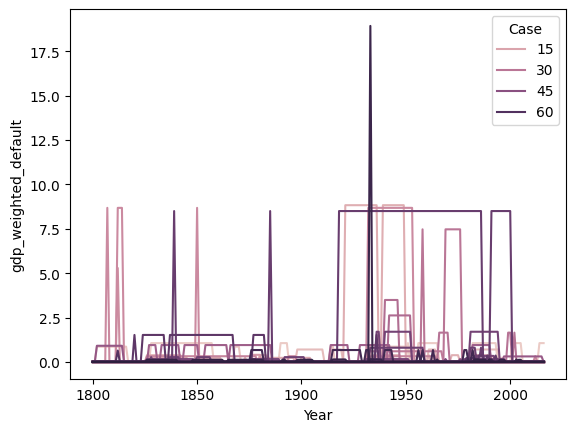

In [28]:
sns.lineplot(data=GlobalCrisisDF, x=GlobalCrisisDF.Year ,y=GlobalCrisisDF.gdp_weighted_default, hue='Case')

<AxesSubplot:xlabel='Year', ylabel='gdp_weighted_default'>

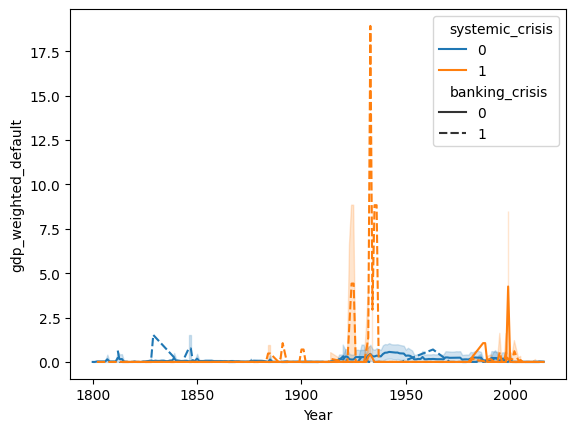

In [29]:
#lineplot vs boxplot
sns.lineplot(GlobalCrisisDF, x='Year',y='gdp_weighted_default', hue='systemic_crisis', style='banking_crisis')

<AxesSubplot:xlabel='Year', ylabel='gdp_weighted_default'>

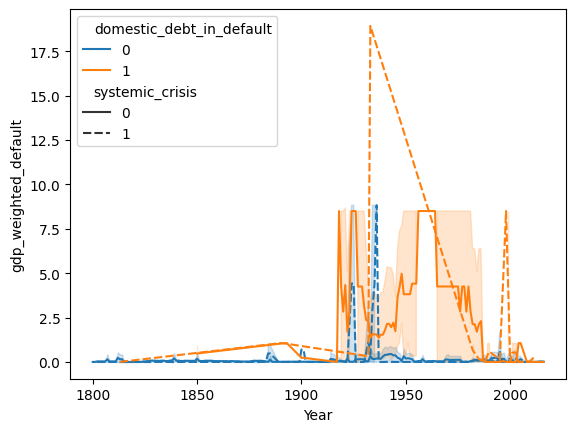

In [30]:
#Correlation between a default on domestic debt and systemic crisis
sns.lineplot(GlobalCrisisDF, x='Year',y='gdp_weighted_default', hue='domestic_debt_in_default', style='systemic_crisis')

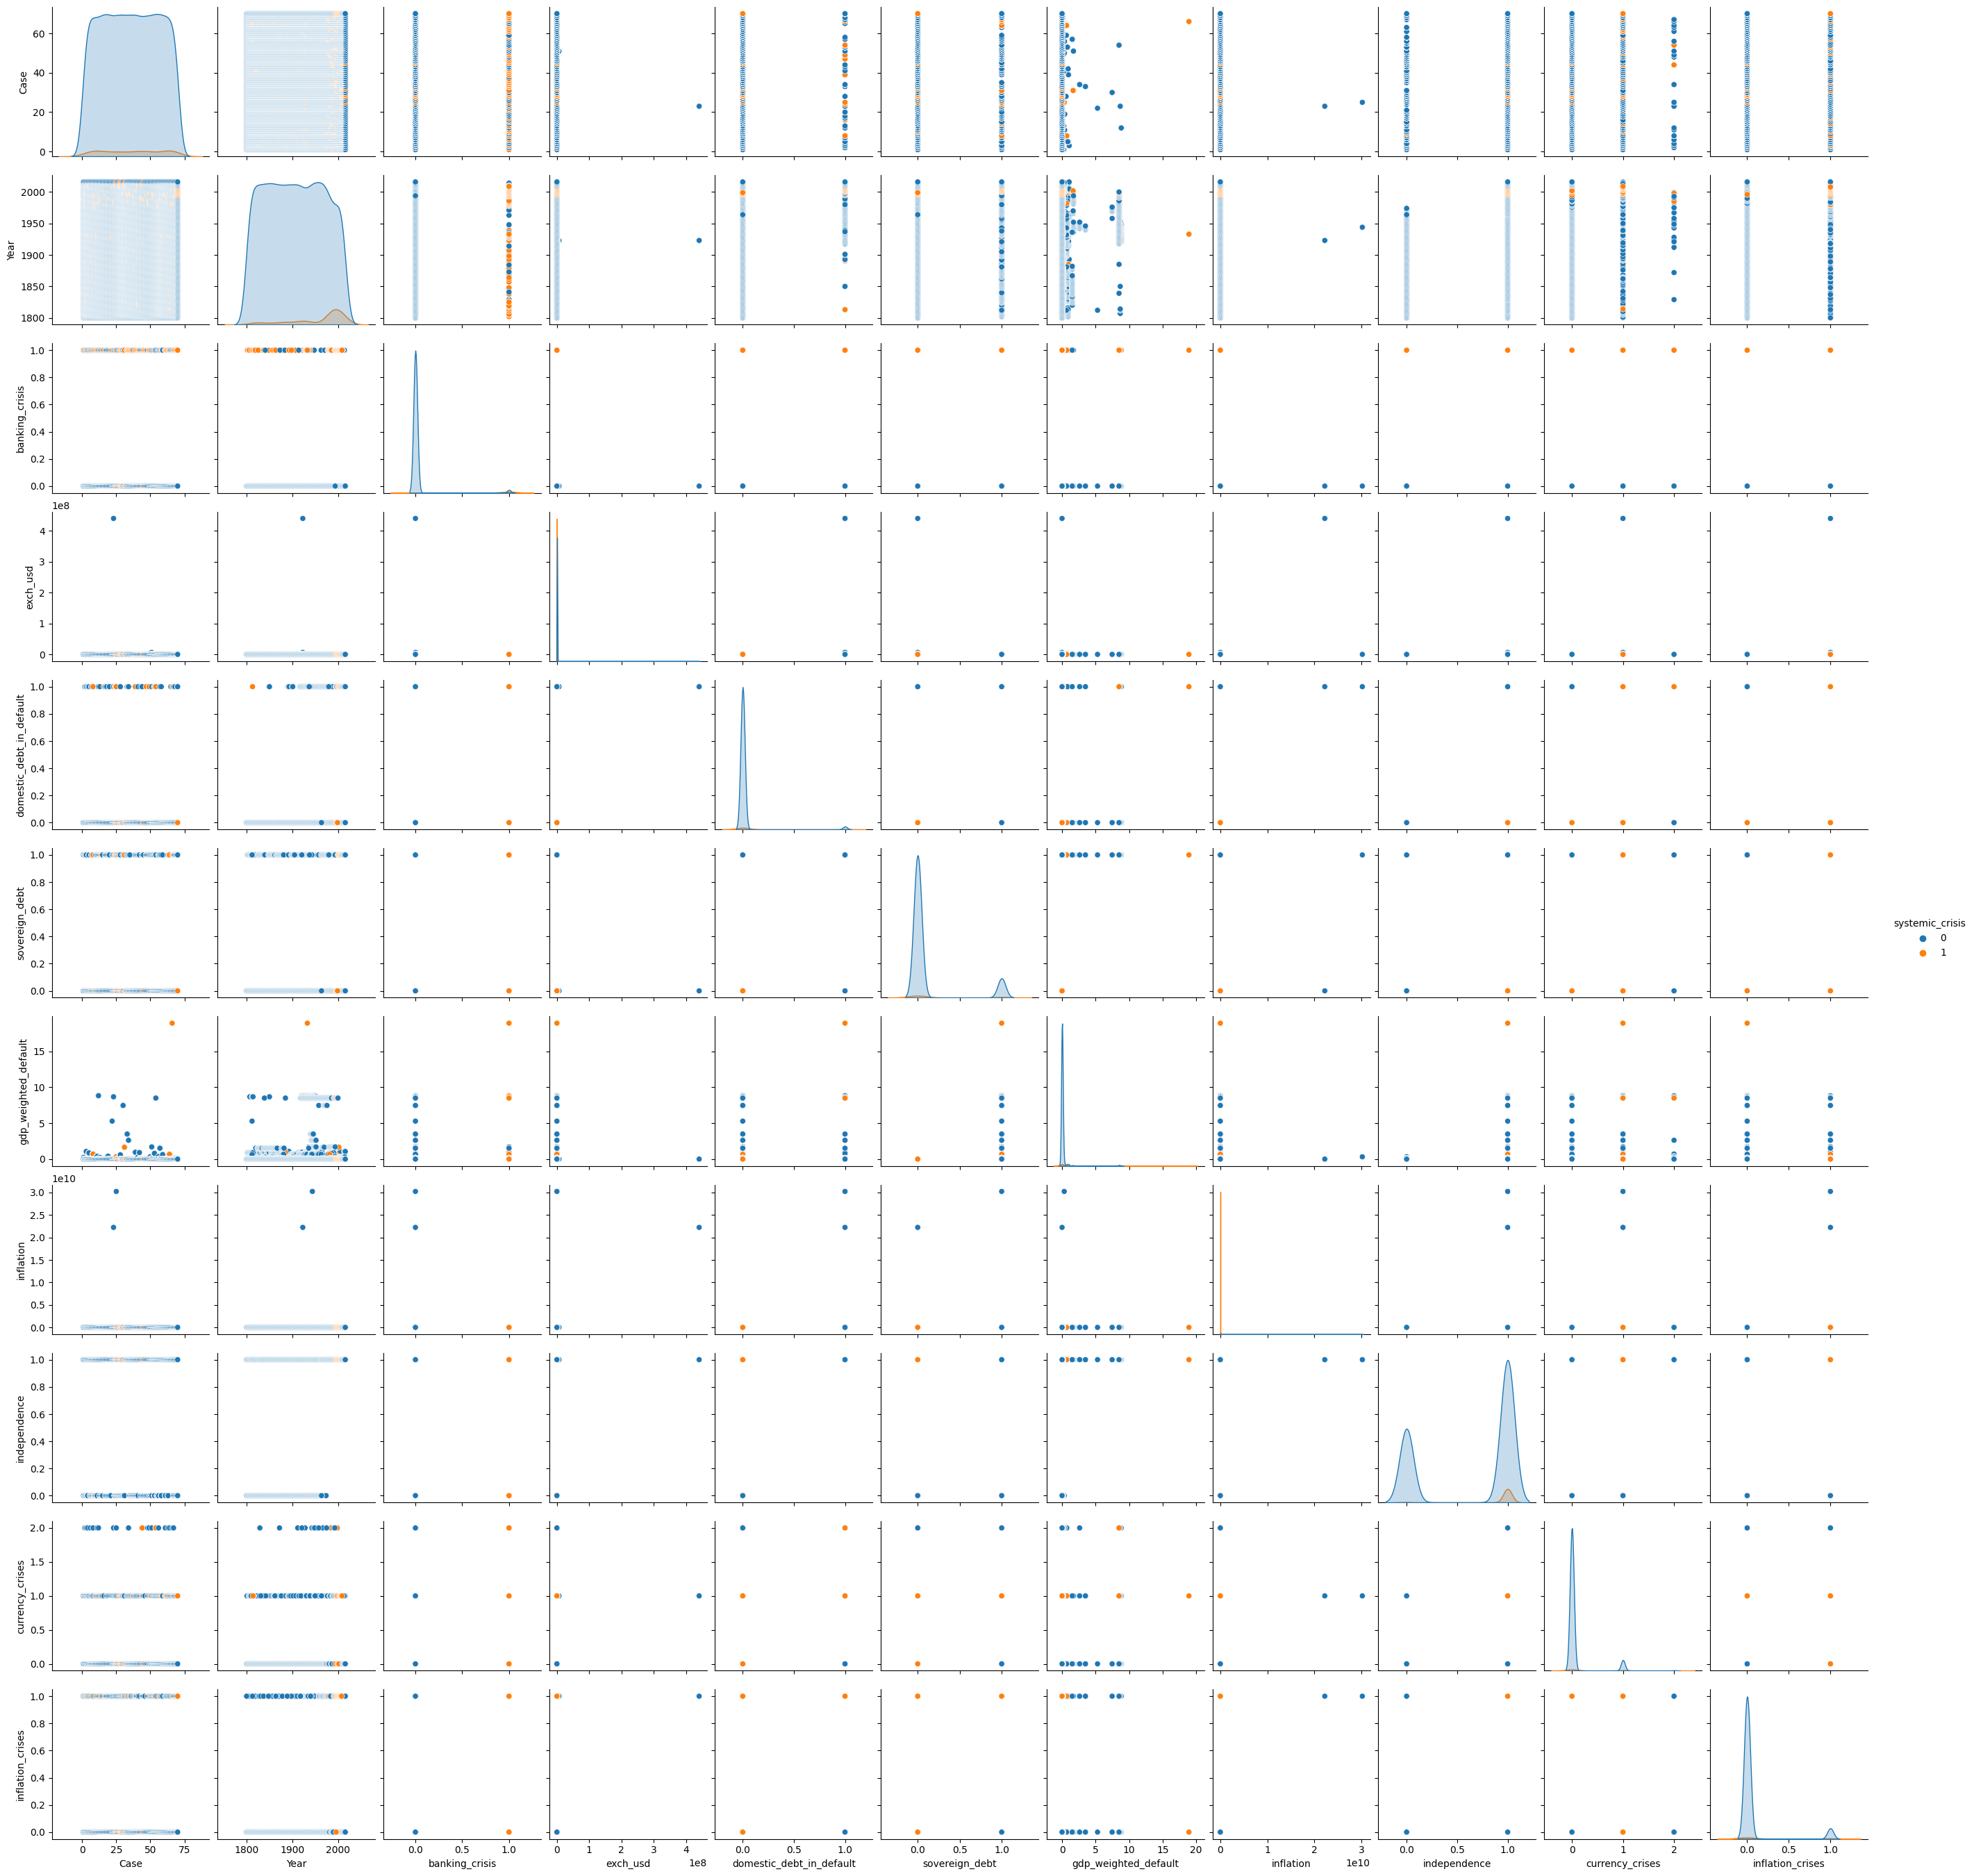

In [30]:
sns.pairplot(GlobalCrisisDF, hue="systemic_crisis")

**Observations:**

*Currency crisis*: a sudden and steep decline in the value of a country's/region's currency

*Banking crisis*: while often read as systemic banking crisis. It occurs when many banks in a country are in serious solvency or 

liquidity problems at the same time either
because they were all hit with the same external shock or there was an avalanche effect from the failure of one bank.


There is a strong correlation between banking crises, domestic_debt_default, currency crises and our target

variable systemic crisis. They virtually share instances of occurrences.

*Examples*
- The Subprime mortgage crisis in the USA
- Early 1800's UK and US recessions due to bank failures and economic depression

There is a correlation between a banking crisis and systemic crisis.

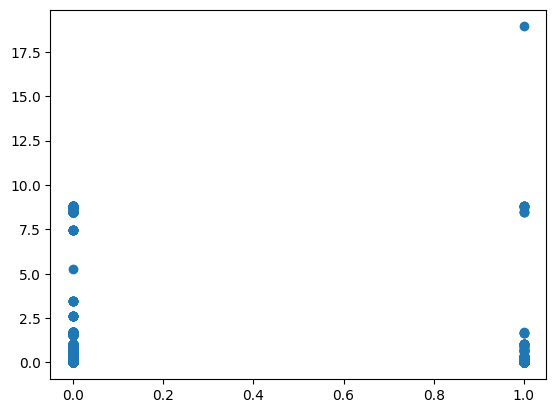

In [53]:
#trying to check if there is a correlation btwn gdp_weight_default and a systemic risk

plt.scatter('systemic_crisis','gdp_weighted_default',data=GlobalCrisisDF)

There are more instances of systemic crisis in low gdp occurrences in nations.

In [31]:
type(GlobalCrisisDF['exch_usd'].iloc[5])

numpy.float64

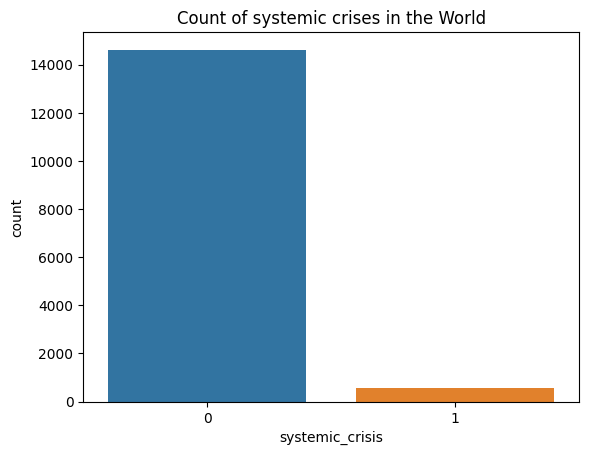

In [32]:
"""Checking for inbalances in the data"""
sns.countplot(x="systemic_crisis", data=GlobalCrisisDF)
plt.title("Count of systemic crises in the World")
plt.show()

As you can see, there is quite an imbalance in the systemic crisis target variable; this may become a risk for overfitting later

**Questions:**

*Is there a correlation of a systemic risk in one country affecting economies of others as well?*

*What is the period of recovery alternately, the period of effect the systemic crisis, on other countries' economies?*

In [33]:
"""We are using SMOTE(Synthetic Minority Oversampling Technique) to create synthetic values for our columns to solve the imbalance problem by increasing class distribution"""

from imblearn.over_sampling import SMOTE

In [34]:
"""Splitting training and test data"""
X = GlobalCrisisDF.drop(['systemic_crisis'], axis=1)
Y = GlobalCrisisDF['systemic_crisis']
print(X.head(),'\n')
print(Y.head())

   Case    Year  banking_crisis  exch_usd  domestic_debt_in_default  \
1   1.0  1800.0               0   0.05168                         0   
2   1.0  1801.0               0   0.05168                         0   
3   1.0  1802.0               0   0.05168                         0   
4   1.0  1803.0               0   0.05168                         0   
5   1.0  1804.0               0   0.05168                         0   

   sovereign_debt  gdp_weighted_default  inflation  independence  \
1               0                   0.0        3.4             0   
2               0                   0.0        3.4             0   
3               0                   0.0        3.4             0   
4               0                   0.0        3.4             0   
5               0                   0.0        3.4             0   

   currency_crises  inflation_crises  
1                0                 0  
2                0                 0  
3                0                 0  
4       

In [35]:
"""
Analysis of distribution of instances:
Conclusion: The minority class is 3% of the sample
"""

syscris1 =  Y.loc[Y == 1].count()
syscris0 = Y.loc[Y == 0].count()
print("Instances of systemic crisis: ", syscris1)
print("Instances of  absence of systemic crisis: ", syscris0)
print("Percentage: ", syscris1/syscris0*100, "%" )

Instances of systemic crisis:  567
Instances of  absence of systemic crisis:  14623
Percentage:  3.8774533269506946 %


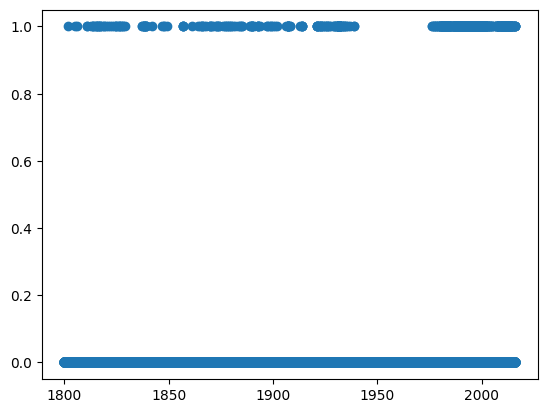

In [36]:
"""Scatterplot of the distribution of minority and majority class of our target variable"""
plt.scatter(x=GlobalCrisisDF["Year"], y=GlobalCrisisDF["systemic_crisis"], cmap="rainbow")
plt.show()


In [37]:
"""
Oversampling to create synthetic values
"""
smo = SMOTE(random_state=42)
X, Y = smo.fit_resample(X,Y)
Y.value_counts()

0    14623
1    14623
Name: systemic_crisis, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
"""
Splitting training and test data. Due to the large size of this sample, cross validation will not be needed
"""
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size=0.3, random_state=42,shuffle=True, stratify=Y )

In [31]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb


In [41]:
"""
Training the data with various parameters for the pretrained model KNN
where params=n_neighbours=123,p=1
"""

knn = KNeighborsClassifier(n_neighbors=123,p=1)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

print("Classification Report for KNN: \n", classification_report(y_test, y_predicted))
print("Confusion matrix of KNN: \n", confusion_matrix(y_test, y_predicted))

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      4387
           1       0.80      0.94      0.87      4387

    accuracy                           0.85      8774
   macro avg       0.87      0.85      0.85      8774
weighted avg       0.87      0.85      0.85      8774

Confusion matrix of KNN: 
 [[3345 1042]
 [ 243 4144]]


In [42]:
"""
Training the data with various parameters for the pretrained model KNN
where params=n_neighbours=123, n_jobs=-1(all processors), p=2
"""

knn = KNeighborsClassifier(n_neighbors=123,p=2,n_jobs=-1)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

print("Classification Report for KNN: \n", classification_report(y_test, y_predicted))
print("Confusion matrix of KNN: \n", confusion_matrix(y_test, y_predicted))

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      4387
           1       0.77      0.93      0.84      4387

    accuracy                           0.83      8774
   macro avg       0.84      0.83      0.83      8774
weighted avg       0.84      0.83      0.83      8774

Confusion matrix of KNN: 
 [[3185 1202]
 [ 313 4074]]


Empirical evidence seems to suggest that an increase of parameter p reduces 
both precision and recall for both classifications of Y

In [43]:
"""
Training using XGBoost
XGBoost is an assortment of training models; but essentially it is an optimisation problem at heart. Like other models, XGBoost
contains a dynamic loss function that the model strives to correct for in every iteration.
"""
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=1)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))

[16:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4387
           1       0.99      0.99      0.99      4387

    accuracy                           0.99      8774
   macro avg       0.99      0.99      0.99      8774
weighted avg       0.99      0.99      0.99      8774

Confusion Matrix of XGBoost: 
 [[4340   47]
 [  42 4345]]


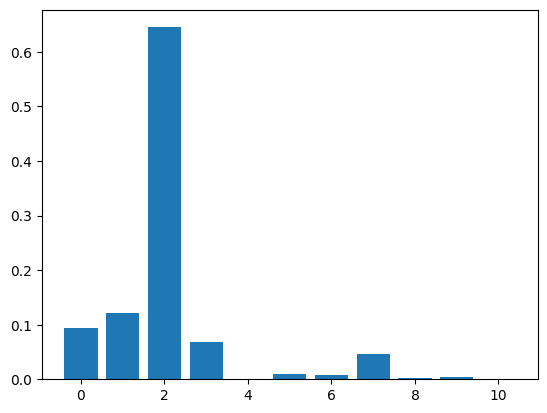

In [44]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

#instantiation of object
RFR = RandomForestRegressor()

# fitting model
RFR.fit(X,Y)

ofImport = RFR.feature_importances_

plt.bar([x for x in range(len(ofImport))], ofImport)
plt.show()

In [46]:
RFR.feature_names_in_

array(['Case', 'Year', 'banking_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_debt',
       'gdp_weighted_default', 'inflation', 'independence',
       'currency_crises', 'inflation_crises'], dtype=object)

In [35]:
GlobalCrisisDF.loc[GlobalCrisisDF['Case'] == 66]

,Case,Year,banking_crisis,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_debt,gdp_weighted_default,inflation,independence,currency_crises,inflation_crises
14106,66.0,1800.0,0,0,4.462294,0,0,0.0,2.0,1,0,0
14107,66.0,1801.0,0,0,4.363002,0,0,0.0,1.3,1,0,0
14108,66.0,1802.0,0,0,4.474273,0,0,0.0,-15.7,1,0,0
14109,66.0,1803.0,0,0,4.662005,0,0,0.0,5.4,1,0,0
14110,66.0,1804.0,0,0,4.528986,0,0,0.0,4.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14318,66.0,2012.0,0,0,1.625100,0,0,0.0,2.1,1,0,0
14319,66.0,2013.0,0,0,1.655600,0,0,0.0,1.5,1,0,0
14320,66.0,2014.0,0,0,1.557300,0,0,0.0,1.6,1,0,0
14321,66.0,2015.0,0,0,1.473800,0,0,0.0,0.1,1,0,0


In [ ]:
X.columns

Index(['Case', 'Year', 'banking_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_debt', 'gdp_weighted_default',
       'inflation', 'independence', 'currency_crises', 'inflation_crises'],
      dtype='object')

The above plot shows that 'Case', 'Year', 'banking_crisis', 'inflation' and 'exch_usd' have a strong feature importance when making predictions about potential systemic crises.

**Conclusion**

The KNN model produces good results with tuning of parameters, but XGBoost produces a more desired result. The precision and recall greatly improved making this
a preferred model for prediction. The trade-off would be the longer execution time.

Also, systemic crises and whether they happen are also affected by external shocks. Unfortunately they weren't included in this data.

We have also managed to create a feature importance ranking that shows the variables to watch out for more keenly when making
predictions about potential systemic crisis that affect economies.

*Addition*

By adding the case variable, the precision and recall scores significantly increased.